In [1]:
import pandas
import os

In [2]:
models = ["gpt-4o", "gpt-4o-mini", "llama3.1-8b-instruct-q4_0"]
setting = ["", "_no_name"]
results_path = "../results/llms"

In [3]:
# load results
result_path = os.path.join(results_path, "run1")
results = {}
for model in models:
    for s in setting:
        result_file = os.path.join(result_path, f"{model}{s}_validation.csv")
        results[f"{model}{s}"] = pandas.read_csv(result_file)

In [4]:
accuracy = {}

# calculate accuracy
for model in models:
    for s in setting:
        result = results[f"{model}{s}"]
        accuracy[f"{model}{s}"] = result["valid?"].sum() / len(result)

In [5]:
accuracy

{'gpt-4o': 0.7291666666666666,
 'gpt-4o_no_name': 0.6979166666666666,
 'gpt-4o-mini': 0.640625,
 'gpt-4o-mini_no_name': 0.6770833333333334,
 'llama3.1-8b-instruct-q4_0': 0.3385416666666667,
 'llama3.1-8b-instruct-q4_0_no_name': 0.3489583333333333}

In [19]:
def load_all_runs(num_runs=5):
    runs = []
    for i in range(1, num_runs + 1):
        result_path = os.path.join(results_path, f"run{i}")
        results = {}
        for model in models:
            for s in setting:
                result_file = os.path.join(result_path, f"{model}{s}_validation.csv")
                if os.path.exists(result_file):
                    results[f"{model}{s}"] = pandas.read_csv(result_file)
        runs.append(results)
    return runs

def get_result(df):
    return df["valid?"].sum() / len(result)

In [20]:
evaluation_results = []
for run in load_all_runs():
    accuracy = {}
    for key in run.keys():
        result = run[key]
        accuracy[key] = get_result(result)
    evaluation_results.append(accuracy)

In [30]:
evaluation_results_cumulative = []
previous_results = {}
for run in load_all_runs():
    accuracy = {}
    for key in run.keys():
        result = run[key]["valid?"]
        if key in previous_results:
            result = result | previous_results[key]
        accuracy[key] = result.sum() / len(result)
        previous_results[key] = result
    evaluation_results_cumulative.append(accuracy)

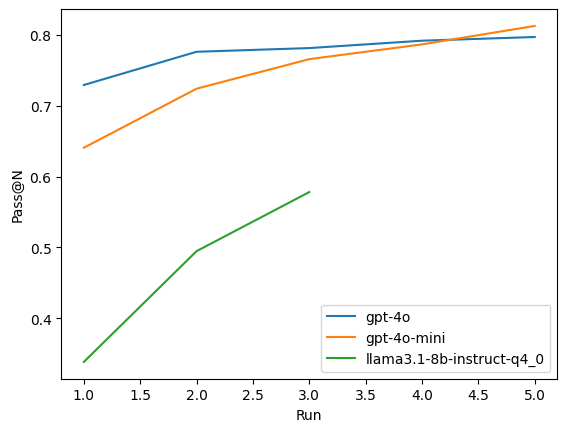

In [40]:
# plot the results for evaluaiton_results cumulative over runs on the same plot
import matplotlib.pyplot as plt

for model in models:
    for s in setting[:1]:
        values = []
        for run in evaluation_results_cumulative:
            if f"{model}{s}" in run:
                values.append(run[f"{model}{s}"])
        
        plt.plot(range(1, len(values) + 1), values, label=f"{model}{s}")

plt.xlabel("Run")
plt.ylabel("Pass@N")
plt.legend()